## Observations and Insights

1. Ramicane is the overall most effective drug, but Capomulin comes very close in some interesting ways. Ramicane has a lower mean tumor volume and a lower overall variance, and while the IQR of Ramicane covers a lower set of values, the IQR of Capomulin is actually a bit smaller. In all of the metrics that show Ramicane coming out ahead, Capomulin is only behind by a small margin, so these differences are almost certainly not statistically significant. This combined with Capomulin's slightly tighter IQR (also too small to assert statistical significance, but potentially meaningful) suggest that Capomulin could come out on top with continued research.


2. There is a significant ($r^2 = 0.71$), positive correlation between mouse weight and average tumor volume within the Capomulin regimen. This is not due to the additional weight of the tumor, because weight per mouse is reported as the same value across all timepoints. I think this implies that larger mice can accomodate more tumor growth either in the albolute or at least before they start experiencing health decline into death, and that tumor volume is not a direct measure of drug effectiveness. This underscores the importance of trying to standardize mouse weight; if a certain drug happened to be tested on larger mice, that would make it falsely appear like a weaker drug than it actually way! I wonder if that's true of any of the above drugs I was considering as the best...


3. Propriva has a smaller sample size than the other treatments in this study. When I look closer at Propriva's timepoint data, it seems that the majority of those mice survive through to the final timepoint (45), so the smaller sample size is not explained by premature mouse death. Since it seems this drug was just researched a bit less thoroughly than the others, I conclude that our conclusions regarding this drug are weaker than those from other drugs.


4. Also, Ceftamin has a bunch of mice that didn't finish their treatment! I included all Ceftamin data as-is despite this fact, but that should be taken into account when considering what our data for Ceftamin represents. It is likely a less good drug than it seems like it is from metrics like the IQR and mean tumor volume...


## Dependencies and starter code

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import random
import os

# Study data files
file_to_load1 = os.path.join("data", "Mouse_metadata.csv")
file_to_load2 = os.path.join("data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(file_to_load1)
study_results = pd.read_csv(file_to_load2)

# Combine the data into a single dataset
mouseStudyResults = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

propriva = mouseStudyResults.loc[mouseStudyResults["Drug Regimen"] == "Ceftamin"]
propriva.head(60)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
489,a275,Ceftamin,Female,20,28,25,53.576064,1
490,a275,Ceftamin,Female,20,28,30,54.444713,2
491,a275,Ceftamin,Female,20,28,35,56.353538,2
492,a275,Ceftamin,Female,20,28,40,60.921539,3
493,a275,Ceftamin,Female,20,28,45,62.999356,3


## Summary statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM
#   of the tumor volume for each regimen

groupedDrugs = mouseStudyResults.groupby('Drug Regimen')['Tumor Volume (mm3)']

drugs = pd.DataFrame({
    "Mean Tumor Volume" : groupedDrugs.mean()
})

drugs["Median Tumor Volume"] = mouseStudyResults.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drugs["Tumor Volume Variance"] = mouseStudyResults.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drugs["Tumor Size Standard Deviation"] = mouseStudyResults.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drugs["Standard Error of the Mean"] = mouseStudyResults.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

drugs = drugs.round(3)
drugs

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Size Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar plots

Text(0.5, 1.0, 'Data Points per Drug in Study')

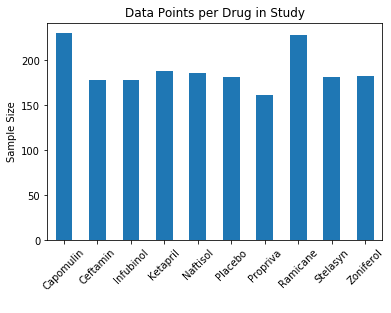

In [20]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
instancesDrug = mouseStudyResults.groupby("Drug Regimen")["Drug Regimen"].count()

ax = instancesDrug.plot(kind="bar", rot=45)
ax.set_ylabel("Sample Size")
ax.set_xlabel(" ")
ax.set_title("Data Points per Drug in Study")

<function matplotlib.pyplot.show(*args, **kw)>

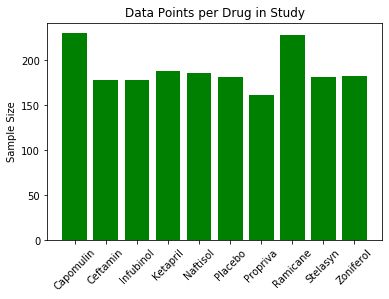

In [21]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot 
x_axis = np.arange(len(drugs))
plt.bar(x_axis, instancesDrug, color="g", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs.index, rotation=45)
plt.title("Data Points per Drug in Study")
plt.ylabel("Sample Size")
plt.show

## Pie plots

Text(0.5, 1.0, 'Male vs Female Mice in Study')

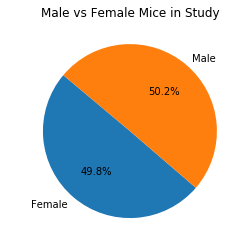

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Notice I am using mouse_metadata here rather than my merged dataframe, to be easily sure each mouse is only counted once.
maleVfemale = mouse_metadata.groupby("Sex")["Sex"].count()
ax2 = maleVfemale.plot(kind="pie", startangle=140, autopct="%1.1f%%")

# Just used the below line to prevent plot from printing with column name along the left side.
ax2.set_ylabel(" ")
ax2.set_title("Male vs Female Mice in Study")


Text(0.5, 1.0, 'Male vs Female Mice in Study')

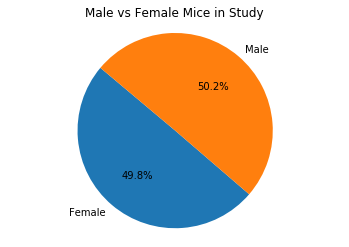

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(maleVfemale, labels=maleVfemale.index, autopct="%1.1f%%", startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Male vs Female Mice in Study")

## Quartiles, outliers and boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

# When I began the assignment, I determined the four best drugs according to lowest average tumor size,
#   but then realized Infubinol was not one of the four best despite being requested for this part of the assignment.
#   So, I expanded this section to include the top 5, because it didn't feel right to exclude Propriva (a better drug),
#   but I also understand that you asked for Infubinol for the sake of having an outlier in the dataset.

# Sorted tumor volume mean allows me to identify these five most promising drugs.
sortedTumors = drugs["Mean Tumor Volume"].sort_values()
fiveBestDrugs = sortedTumors.index[0:5]

# This finds all mouse data associated with the four best drugs
topDrugsMice = mouseStudyResults.loc[mouseStudyResults["Drug Regimen"].isin(fiveBestDrugs)]

# This grabs the index associated with each max timepoint per mouse,
#   then I grab those indices out of the parent dataframe and reference the tumor volume of each row.
timeIdxPerMouse = topDrugsMice.groupby("Mouse ID")["Timepoint"].idxmax()
bestDrugMiceFinal = mouseStudyResults.iloc[timeIdxPerMouse]

finalVolPerMouse = pd.DataFrame({
    "Drug Regimen" : bestDrugMiceFinal["Drug Regimen"],
    "Mouse ID" : bestDrugMiceFinal["Mouse ID"],
    "Final Tumor Volume (mm3)" : round(bestDrugMiceFinal["Tumor Volume (mm3)"],2)
})
finalVolPerMouse = finalVolPerMouse.set_index("Drug Regimen")
finalVolPerMouse.head(10)

,Mouse ID,Final Tumor Volume (mm3)
Drug Regimen,,
Infubinol,a203,67.97
Infubinol,a251,65.53
Ceftamin,a275,63.00
Ramicane,a411,38.41
Ramicane,a444,43.05
Ramicane,a520,38.81
Infubinol,a577,57.03
Ramicane,a644,32.98
Infubinol,a685,66.08


In [25]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in fiveBestDrugs:
    
    currentDrugMice = bestDrugMiceFinal.loc[bestDrugMiceFinal["Drug Regimen"] == drug]
    bestDrugMiceFinalVol = currentDrugMice["Tumor Volume (mm3)"]
    
    quartiles = bestDrugMiceFinalVol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"{drug} stats:")
    print(f"The lower quartile of tumor volumes is: {round(lowerq,2)}")
    print(f"The upper quartile of tumor volumes is: {round(upperq,2)}")
    print(f"The interquartile range of tumor volumes is: {round(iqr,2)}")
    print(f"The median of tumor volumes is: {round(quartiles[0.5], 2)} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound,2)} could be outliers.")
    print(f"Values above {round(upper_bound,2)} could be outliers.")

    numOutliers = 0
    for volume in bestDrugMiceFinalVol:
        if volume > upper_bound:
            numOutliers += 1
        if volume < lower_bound:
            numOutliers += 1

    if numOutliers == 1:
        print(f"There is {numOutliers} outlier. \n")
    else:
        print(f"There are {numOutliers} outliers. \n")

Ramicane stats:
The lower quartile of tumor volumes is: 31.56
The upper quartile of tumor volumes is: 40.66
The interquartile range of tumor volumes is: 9.1
The median of tumor volumes is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
There are 0 outliers. 

Capomulin stats:
The lower quartile of tumor volumes is: 32.38
The upper quartile of tumor volumes is: 40.16
The interquartile range of tumor volumes is: 7.78
The median of tumor volumes is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
There are 0 outliers. 

Propriva stats:
The lower quartile of tumor volumes is: 49.12
The upper quartile of tumor volumes is: 62.57
The interquartile range of tumor volumes is: 13.45
The median of tumor volumes is: 55.84 
Values below 28.95 could be outliers.
Values above 82.74 could be outliers.
There are 0 outliers. 

Ceftamin stats:
The lower quartile of tumor volumes is: 48.72
The upper quartile of tumor volumes is: 64.3
Th

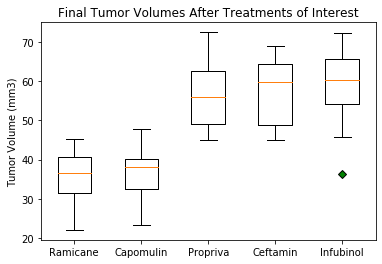

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
finTumorBPdata = []
for drug in fiveBestDrugs:
    currentDrugMice = bestDrugMiceFinal.loc[bestDrugMiceFinal["Drug Regimen"] == drug]
    finTumorBPdata.append(currentDrugMice["Tumor Volume (mm3)"])

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes After Treatments of Interest')
ax1.set_ylabel('Tumor Volume (mm3)')
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.boxplot(finTumorBPdata, flierprops=green_diamond)


tick_locations = [1, 2, 3, 4, 5]
plt.xticks(tick_locations, fiveBestDrugs, rotation=0)

plt.show()

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

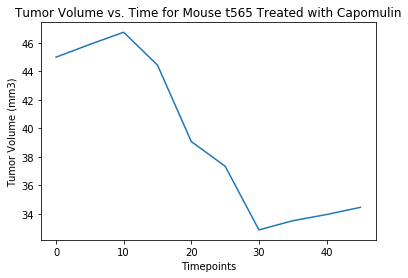

In [95]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# I have set this up to choose a random Capomulin mouse each time!
#   Run this cell multiple times to see my hard work :D
capomulinRows = mouseStudyResults.loc[mouseStudyResults["Drug Regimen"] == "Capomulin"]
capomulinMice = capomulinRows["Mouse ID"].unique()

ID = random.choice(capomulinMice)

capMouse = mouseStudyResults.loc[mouseStudyResults["Mouse ID"] == ID]
x_axis = capMouse["Timepoint"]
y_axis = capMouse["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)

plt.title(f"Tumor Volume vs. Time for Mouse {ID} Treated with Capomulin")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

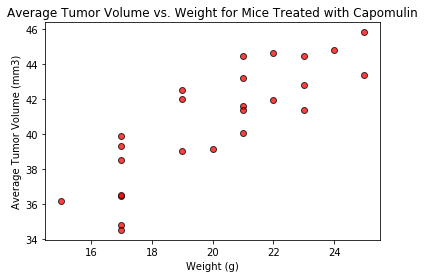

In [96]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# This generates the average tumor volume per mouse
capAvgTumor = capomulinRows.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# This grabs the weight of each mouse
capMiceWeight = capomulinRows.groupby("Mouse ID")["Weight (g)"].unique()

plt.scatter(capMiceWeight, capAvgTumor, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

plt.title(f"Average Tumor Volume vs. Weight for Mice Treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

The linear regression best-fit line is: y = 0.95x + 21.55
The r-squared value is: 0.71


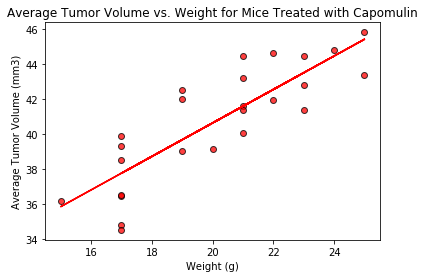

In [97]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume
#   for the Capomulin regimen

x_values = capMiceWeight.astype(float)
y_values = capAvgTumor.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.title(f"Average Tumor Volume vs. Weight for Mice Treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The linear regression best-fit line is: {line_eq}")
print(f"The r-squared value is: {round(rvalue**2, 2)}")
plt.show()